# Confidence Intervals

In [1]:
import scipy.stats
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

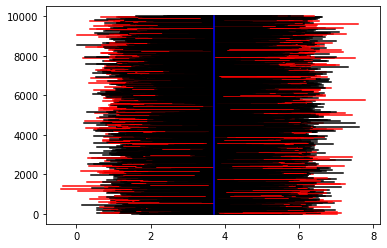

904/10000


In [26]:
np.random.seed(111)
mu = 3.7
sigma = 2
n = 9
nexp = 10000  #Have upped the number of iterations to 10k, will take approx 1-2 min
counter = 0
for i in range(nexp):
    # simulates n realizations from a Gaussian with mean mu and var sigma^2
    x = np.random.normal(mu,sigma,n) 
    # can use the builtin np.var function to calculate the variance or use the formula for the variance
    # Have used the formula for estimate of sigma
    sig = np.sqrt(1/(n-1) * sum(abs(x-np.mean(x))**2,0))  #sum(iterable,start)
     # computes the 0.025quantile of a Gaussian, roughly -1.96 
    fac1 = scipy.stats.norm.ppf(0.025, 0, 1)
     # computes the 0.975quantile of a Gaussian, roughly 1.96 
    fac2 = scipy.stats.norm.ppf(0.975, 0, 1)
    a = np.mean(x) - fac2*sig/np.sqrt(n) 
    b = np.mean(x) - fac1*sig/np.sqrt(n) 
    #if the simulated line is inside the confidence interval
    #nexp is set to be less than 10001 so that the plot is not over filled
    if (a < mu) & (mu < b) and nexp < 10000+1:
        plt.plot((a, b), (i, i), 'k-')
    #when it is outside increase counter by 1
    else:
        counter += 1
        if nexp < 10000+1:
            plt.plot((a, b), (i, i), 'r-')
if nexp < 10000+1:
    plt.plot((mu, mu), (0, nexp), 'b-')
    plt.show()
print(str(counter) + "/" + str(nexp))

#read lines are the ones that lie outside the confidence interval, black ones are the ones inside

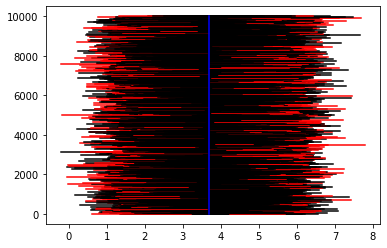

859/10000


In [27]:
newcounter = 0
for i in range(nexp):
    # simulates n realizations from a Gaussian with mean mu and var sigma^2
    x = np.random.normal(mu,sigma,n) 
    # can use the builtin np.var function to calculate the variance or use the formula for the variance
    #https://numpy.org/doc/stable/reference/generated/numpy.var.html
    sig = np.sqrt(np.var(x,ddof=1,dtype=np.float64))
     # computes the 0.025quantile of a Gaussian, roughly -1.96 
    fac1 = scipy.stats.norm.ppf(0.025, 0, 1)
     # computes the 0.975quantile of a Gaussian, roughly 1.96 
    fac2 = scipy.stats.norm.ppf(0.975, 0, 1)
    a = np.mean(x) - fac2*sig/np.sqrt(n)
    b = np.mean(x) - fac1*sig/np.sqrt(n)
    #if the simulated line is inside the confidence interval
    #nexp is set to be less than 10001 so that the plot is not over filled
    if (a < mu) & (mu < b) and nexp < 10000+1: 
            plt.plot((a, b), (i, i), 'k-')
    #when it is outside increase counter by 1
    else:
        newcounter += 1
        if nexp < 10000+1:
            plt.plot((a, b), (i, i), 'r-')
if nexp < 10000+1:
    plt.plot((mu, mu), (0, nexp), 'b-')
    plt.show()
print(str(newcounter) + "/" + str(nexp))

In [23]:
"""
The variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).

The mean is normally calculated as x.sum() / N, where N = len(x). 
If, however, ddof is specified, the divisor N - ddof is used instead. 
In standard statistical practice, ddof=1 provides an unbiased estimator of 
the variance of a hypothetical infinite population. ddof=0 provides a maximum 
likelihood estimate of the variance for normally distributed variables.

Note that for complex numbers, the absolute value is taken before squaring, 
so that the result is always real and nonnegative.

For floating-point input, the variance is computed using the same precision the input has. 
Depending on the input data, this can cause the results to be inaccurate, 
especially for float32 (see example below). 
Specifying a higher-accuracy accumulator using the dtype keyword can alleviate this issue.
"""

'\nThe variance is the average of the squared deviations from the mean, i.e., var = mean(abs(x - x.mean())**2).\n\nThe mean is normally calculated as x.sum() / N, where N = len(x). \nIf, however, ddof is specified, the divisor N - ddof is used instead. \nIn standard statistical practice, ddof=1 provides an unbiased estimator of \nthe variance of a hypothetical infinite population. ddof=0 provides a maximum \nlikelihood estimate of the variance for normally distributed variables.\n\nNote that for complex numbers, the absolute value is taken before squaring, \nso that the result is always real and nonnegative.\n\nFor floating-point input, the variance is computed using the same precision the input has. \nDepending on the input data, this can cause the results to be inaccurate, \nespecially for float32 (see example below). \nSpecifying a higher-accuracy accumulator using the dtype keyword can alleviate this issue.\n'